# Project: Investigate a Dataset (TMDB_Movies_Dataset_Analysis!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is dataset collected from the movie database TMDB, that has information about 10000 movies.
<li>Certain columns, like 'cast' and 'genres', contain multiple values separated by pipe (|) characters</li>
<li>There are some odd characters in the 'cast' column. Which will be left as is.</li>
<li>The final two columns ending with '_adj' show the budget and
revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. </li>

<a id='questions'></a>
## Questions

1. Which genres are most popular from year to year?

2. What kinds of properties are associated with movies that have high revenues?


### Importing the necessary libraries to be used for the analysis

In [82]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magic words usage to show plots within the document
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data will be loaded, checked for cleanliness, and then trimmed and cleaned for analysis.

### General Properties

We will load the dataset and check a few rows

In [83]:
# Load the data and check the first few lines
tmdb = pd.read_csv("tmdb-movies.csv")
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


We check for the structure of the data with pandas `shape` method

In [84]:
tmdb.shape

(10866, 21)

The data has 10866 rows and 21 columns

We check for duplicates in the dataset 

In [85]:
tmdb.duplicated().any().sum()

1

There is one duplicate row in the dataset which needs to be resolved


We want to check for columns that have null values

In [86]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We have duplicated values mostly in columns we don't need in our analysis, columns like `homepage`, `tagline`, `keywords`, `production_companies`.

We check the data type of the dataset using the `dtypes` attribute

In [87]:
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The `release_year` column of the dataset has an object (string) data type which has to be cast to datatime for exploration

We use pandas `info` method, to get more information about the data

In [88]:
# Getting information about the data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

These are the detailed information about the dataset
>  
>  
> - **Movies (Rows)**: 10806
>  
> - **Attributes (Columns)**: 21
>  
> - **Column Names**:       
>   - id
>   - imdb_id
>   - popularity
>   - budget:
>   - revenue:
>   - original_title
>   - cast: Cast
>   - homepage
>   - director
>   - keywords
>   - overview:
>   - runtime
>   - genres:
>   - production_companies
>   - release_date
>   - vote_count
>   - vote_average
>   - release_year
>   - budget_adj
>   - revenue_adj

### Cleaning the dataset from errors identified above:

### Dropping columns


We want to drop some of the columns that are not need for the analysis, some of them even have most of the null values

We want to  drop the columns: `homepage`, `tagline`, `keywords`, `imdb_id`, `overview`, `budget_adj`, `revenue_adj`

In [89]:
columns_drop = ["id", "homepage", "tagline", "keywords", "keywords", "imdb_id", "overview", "budget_adj", "revenue_adj"]

In [90]:
tmdb.drop(columns_drop, axis=1, inplace=True)
tmdb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

### Dropping rows that have `null` values

We now drop all null values

In [91]:
tmdb.dropna(axis=0, inplace=True)
tmdb.shape

(9773, 13)

We check again for null values

In [92]:
tmdb.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

This time there are no `null` values

### Dropping duplicates

We first of all check that row that has duplicate

In [93]:
tmdb[tmdb.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


This is obvious one row of data, which we can drop.

In [94]:
tmdb.drop_duplicates(inplace=True)

We check again for any duplicates

In [95]:
tmdb.duplicated().sum()

0

### Fixing the data types

Here, we want to change the release_date column date type to datetime, that was identified earlier.

I will also want to change the `vote_count` to millions so as to analyze the relationshipthat it has with `popularity` column which is already in millions.

#### Changing the `release_date` data type to datetime

We will like to change the year of the `release_date` column with the `release_year` column to account for years before 1971

In [96]:
# Showing why this needs to be done
print(pd.to_datetime(["1/1/66"]))

# Correcting the anomaly
pd.to_datetime(["1/1/1966"])

DatetimeIndex(['2066-01-01'], dtype='datetime64[ns]', freq=None)


DatetimeIndex(['1966-01-01'], dtype='datetime64[ns]', freq=None)

In [97]:
# WE replace the year part with the `release_year` column using the apply function
#tmdb["release_date"] = tmdb.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

# We now convert the datetype to datetime
tmdb["release_date"] = pd.to_datetime(tmdb.release_date)

In [98]:
# printint out the release_year column
tmdb.release_date.head(10)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
5   2015-12-25
6   2015-06-23
7   2015-09-30
8   2015-06-17
9   2015-06-09
Name: release_date, dtype: datetime64[ns]

#### We now change the `vote_count` to millions

In order to do this, we divide the `vote_count` column values by a million

In [99]:
tmdb["vote_count"] = tmdb.vote_count / 1000000

In [100]:
tmdb.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                     float64
vote_average                   float64
release_year                     int64
dtype: object

We recheck the datatypes again

<a id='eda'></a>
## Exploratory Data Analysis

It is now time to compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.



We use pandas `describe` method to compute common statistical measures

In [101]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,0.000239,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,0.000603,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,0.000010,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,0.000018,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,0.000046,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,0.000173,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


Looking at the summary statistics, there are zero values in the `budget`, `revenue`, and `runtime` columns. this can affect our analysis if we don't come up with a solution.

In [102]:
# Counting the number of zeros ineach column
tmdb[["budget", "revenue", "runtime"]].apply(lambda x: x == 0).sum() 

budget     4751
revenue    5022
runtime      13
dtype: int64

To go further, we want check if there's a relationship between havin zeros in `budget` and `revenue` column

In [103]:
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape)
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue != 0)].shape)

(3806, 13)
(945, 13)


This shows that in most columns that has zeros in the `budget`, the `revenue` column is also zero

We need to replace the zeros in  `budget` column with the mean, for the `revenue` column, we will change replace the zeros for only the rows where the budget is also zero

We want calculate the mean for each year

In [104]:
each_year_mean = tmdb.groupby("release_year")[["budget", "revenue", "runtime"]].mean()
each_year_mean.head(10)

,budget,revenue,runtime
release_year,,,
1960,6.892796e+05,4.531406e+06,110.656250
1961,1.537900e+06,1.125734e+07,119.866667
1962,1.824071e+06,7.185995e+06,125.833333
1963,2.156809e+06,5.511911e+06,111.323529
1964,9.630039e+05,8.316629e+06,111.195122
1965,2.064856e+06,1.347300e+07,119.294118
1966,1.308064e+06,1.925834e+06,108.590909
1967,2.795889e+06,2.049541e+07,109.416667
1968,1.944297e+06,7.154945e+06,110.540541


We want to create a function to replace the zeros

In [105]:
def zeros_replace(df1, col, df):
    if (df1[col] == 0).all():
        df1[col] = df.loc[df1.release_year, col]
    return df1

Creating a subset of the missing `budget` and `revenue` columns

In [106]:
missing_budget_revenue = tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)]
missing_budget_revenue

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,0.000027,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,0.000569,7.7,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,0.000011,5.4,2015
100,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,0.000475,7.0,2015
101,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015-09-26,0.000161,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,0.000013,7.0,1966
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,0.000011,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,0.000020,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,0.000011,6.5,1966


We now replace the zeros

In [107]:
missing_budget_revenue = missing_budget_revenue.apply(
    lambda x: zeros_replace(x, ['budget', 'revenue'], each_year_mean),
    axis=1)

tmdb[tmdb.index.isin(missing_budget_revenue.index)] = missing_budget_revenue


Rechecking the dataset again

In [108]:
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape)


(0, 13)


We now remove the zeros in runtime `column` and the remaining zeros in `budget` column as before 

In [109]:
# Filtering the dataset
missing_runtime_subset = tmdb[tmdb.runtime == 0]
missing_budget_subset = tmdb[tmdb.budget == 0]

# Replacing zeros in the subset
missing_runtime_subset = missing_runtime_subset.apply(lambda x: zeros_replace(x, ["runtime"], each_year_mean), axis=1)
missing_budget_subset = missing_budget_subset.apply(lambda x: zeros_replace(x, ["budget"], each_year_mean), axis=1)

# replacing in the dataset
tmdb[tmdb.index.isin(missing_runtime_subset.index)] = missing_runtime_subset
tmdb[tmdb.index.isin(missing_budget_subset.index)] = missing_budget_subset


Rechecking again 

In [110]:
print(tmdb[tmdb.runtime == 0].shape)
print(tmdb[tmdb.budget == 0].shape)

(0, 13)
(0, 13)


We now drop the remaining zeros in the 

In [111]:
# Dropping the zeros
tmdb.drop(tmdb[tmdb.revenue == 0].index, inplace=True)

# Final shape of the data set
print(tmdb.shape)

(8556, 13)


We finally check if we have correct all the anomalies.

In [112]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8556.000000,8.556000e+03,8.556000e+03,8556.000000,8556.000000,8556.000000,8556.000000
mean,0.733387,2.508357e+07,6.951224e+07,103.224297,0.000264,6.008555,2000.883824
std,1.095286,3.082744e+07,1.243297e+08,27.562515,0.000639,0.896003,12.994818
min,0.000188,1.000000e+00,2.000000e+00,3.000000,0.000010,1.500000,1960.000000
25%,0.237060,1.033505e+07,1.916562e+07,91.000000,0.000019,5.500000,1994.000000
50%,0.435536,1.700000e+07,4.356401e+07,100.000000,0.000050,6.100000,2005.000000
75%,0.833576,2.500000e+07,5.667039e+07,113.000000,0.000198,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


### Research Question 1 (Which genres are most popular from year to year?)

As was discussed in the introduction, the `genres` column has values that are separated by (|) symbol.
so it it needs to be preprocessed before it can be used.

To do this, we will create a function to split the values into different rows of data.

In [113]:
def split_multivalue_columns(df, col, delimiter="|"):
    # making a copy of the Data Frame
    df_copy = df.copy()
    
    # First we split the string values  where the (|) is
    df_copy[col] = df_copy[col].str.split(delimiter)
    
    # Then the splitted values are accross different columns
    return df_copy.explode(col)

In [114]:
# We first check the structure of the dataset
print(tmdb.shape)

# preprocessing the column with the function
tmdb_genre = split_multivalue_columns(tmdb, "genres")

# rechecking the structure again
tmdb_genre.shape

(8556, 13)


(21575, 13)

The data points has grown from `8556` to `21,575`

Let us check the number genres in the column and their number

In [115]:
print(tmdb_genre.genres.unique())
tmdb_genre.genres.nunique()

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


20

#### Lets look at first part of the question 1, which genre seem to be the most popular? 

In [116]:
# Group the genres
tmdb_genre_grouped = tmdb_genre.groupby("genres")

# computing the mean, resetting the index and sorting by popularity
tmdb_pop = tmdb_genre_grouped.popularity.mean().reset_index().sort_values("popularity", ascending=False)
tmdb_pop

,genres,popularity
1,Adventure,1.300652
15,Science Fiction,1.173695
8,Fantasy,1.134354
0,Action,1.050177
2,Animation,0.945121
7,Family,0.880988
17,Thriller,0.832120
4,Crime,0.808287
18,War,0.803176
13,Mystery,0.760877


#### We want to create a custom function to help us with our visualizations.

In [117]:
def custom_plot(df, col, title, xlabel, ylabel, figsize=(16, 8), add_mean=False, 
    plot_type="line", xticks="Keep_original", legend:list=[],
    legend_loc="upper left", *plot_args, **plot_kwargs):
    plt.clf()
    fig, ax = plt.subplots(figsize=figsize)

    # setting up the graph
    length = df.shape[0]
    x_tick_points = np.linspace(1, length, length)

    # getting the plot type
    function = ax.plot if plot_type == 'line' else ax.bar

    # getting the bar's width
    bar_width = plot_kwargs.get('width', 0)

    # drawing the graph
    if type(col) in [str, tuple, int]:
        function(x_tick_points, df[col], **plot_kwargs)
    elif type(col) == list:
        for idx, column in enumerate(col):
            function(x_tick_points + idx * bar_width, df[column], **plot_kwargs)
    if add_mean:
        mean_value = round(df[col].mean(), 2)
        ax.plot(x_tick_points, np.repeat(mean_value, length), "--")

    x_tick_position = 0
    if plot_type == "bar" and type(col) == list:
        bar_width = bar_width or 0.6
        x_tick_position = bar_width * ((len(columns) - 1) / 2)

    if add_mean and not legend:
        # Changing column names to legend lists
        columns = [col] if type(col) in [str, int, tuple] else columns
        columns = [' '.join(str(column).split('_')).title() for column in columns]
        legend += columns
        legend.append("Mean")
    elif len(legend) and add_mean:
        legend.append("Mean")

    if len(legend):
        plt.legend(legend, loc=legend_loc, fontsize=12)

    legend.clear()
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(x_tick_points + x_tick_position, df[xticks], rotation=45, horizontalalignment='right');

We want to now plot the `tmdb_pop` dataframe to visualize it.

In [1]:
# we call the custom_plot function to plot the graph
custom_plot(tmdb_pop, "popularity", "Popularity of Genres", "Genres", "Popularity in millions", xticks="genres", )

NameError: name 'custom_plot' is not defined

From the graph we can see that `Adventure` is the most popualar movie genre. 

#### Now, lets look at the second part of the question. The genre that is most popular from year to year.

In order to do this, we have to group the dataset by the `release_year` and `genre` column. And then calculate mean of the `popularity` column, and get the max of each year.

In [119]:
# Grouping the dataset by release_year and genre column
tmdb_genre_year_grouped = tmdb_genre.groupby(["release_year", "genres"])

# Calculating the mean of popularity column
tmdb_genre_year_pop = tmdb_genre_year_grouped.popularity.mean()
#print(tmdb_genre_year_pop)

# Subsetting to get the maximum average popularity for each year
tmdb_genre_year_mean_max = tmdb_genre_year_pop[tmdb_genre_year_pop.groupby(level=0).idxmax()]
#tmdb_genre_year_mean_max.reset_index().value_counts("genres")


To visualize the output

<Figure size 432x288 with 0 Axes>

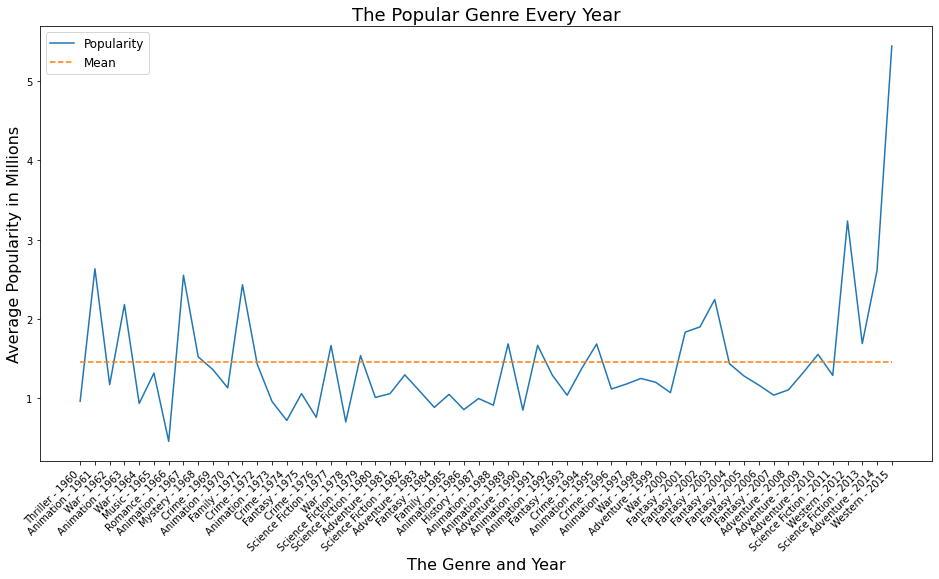

In [130]:
# To create a list with the genre and year for the xticks
x_labels = ["{} - {}".format(x[1], x[0] ) for x in list(tmdb_genre_year_mean_max.index)]
df = pd.DataFrame({"labels": x_labels, "popularity": tmdb_genre_year_mean_max.reset_index()['popularity']})
# Plotting the graph
custom_plot(df,"popularity", "The Popular Genre Every Year", "The Genre and Year",
    "Average Popularity in Millions", xticks="labels", add_mean=True)

From the graph, we can see that the genre that has the most popularity over the years is `Animation`, followed by `Fantasy` and then `Adventure`.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?
)

In order to explore further, lets look at visualization of budget and revenue

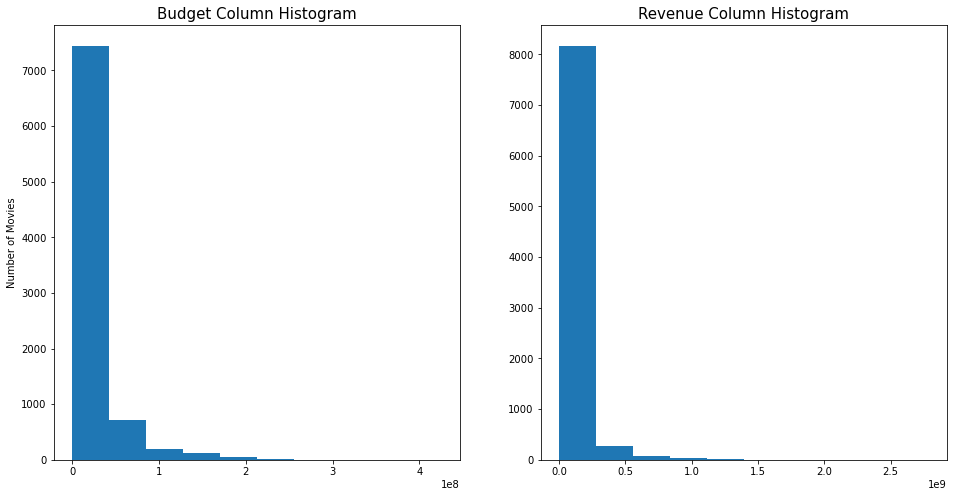

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].hist(tmdb.budget)
ax[0].set_title('Budget Column Histogram', fontsize=15)
ax[0].set_ylabel("Number of Movies")

ax[1].hist(tmdb.revenue)
ax[1].set_title('Revenue Column Histogram', fontsize=15)
ax[0].set_ylabel("Number of Movies");

Lets get the net profit of all movies and store it in `net_profit` column

In [122]:
tmdb["net_profit"] = tmdb.revenue - tmdb.budget
tmdb.net_profit.head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: net_profit, dtype: float64

We will also use the 25 and 75 percentile to score successfull and tanked movies

In [123]:
tmdb.net_profit.describe()

count    8.556000e+03
mean     4.442867e+07
std      1.046486e+08
min     -4.139124e+08
25%      5.939216e+06
50%      2.626803e+07
75%      3.435121e+07
max      2.544506e+09
Name: net_profit, dtype: float64

In [124]:
# Getting the successful and tanked movies
successful_mov = tmdb[tmdb.net_profit >= 3.435121e+07]
tanked_mov = tmdb[tmdb.net_profit <= 5.939216e+06]

successful_mov.shape, tanked_mov.shape

((2399, 14), (2139, 14))

Now we want to compare the average budget of movies were commercially successful and those that tanked

<Figure size 432x288 with 0 Axes>

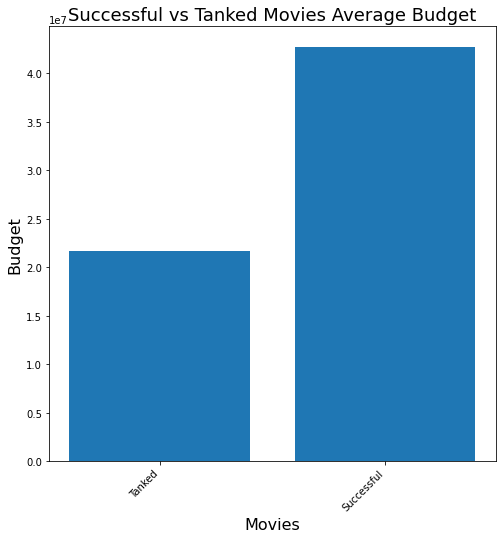

In [125]:
df = pd.DataFrame({'data': [tanked_mov.budget.mean(), successful_mov.budget.mean()], 'ticks': ['Tanked', 'Successful']})
custom_plot(df, 'data', 'Successful vs Tanked Movies Average Budget', "Movies", 'Budget', xticks='ticks', 
    figsize=(8, 8), plot_type='bar')

From the graph, we can see that the budget of successful movies are almost twice the budget of tanked movies.

#### Does having more budget lead to getting more popular or revenue?|

In [126]:
tmdb['popularity_rank'] = tmdb.popularity.rank(method='dense', ascending=False).astype(int)
tmdb['profit_rank'] = tmdb.net_profit.rank(method='dense', ascending=False).astype(int)

In [127]:
tmdb.sort_values('budget', ascending=False, axis=0).head(20) \
    [['budget', 'popularity', 'popularity_rank', 'profit_rank']].style.hide(axis="index")

budget,popularity,popularity_rank,profit_rank
425000000.000000,0.250540,6249,4744
380000000.000000,4.955130,87,53
300000000.000000,4.965391,86,50
280000000.000000,5.944927,55,8
270000000.000000,1.957331,572,700
260000000.000000,2.865684,282,193
260000000.000000,1.588457,827,1970
258000000.000000,2.520912,369,57
255000000.000000,1.214510,1252,4743
250000000.000000,4.840588,97,44


This clearly shows that having more budget does not result more revenue or profit.

#### We want to also ask: Do the `budget`, `revenue`, and `profit` growing over the years?

To answer this question, I just have to use the already computed data frame `each_year_mean` because everything is already done, what is left to do is visualize it.

In [128]:
# Computing the mean of profit for every year
each_year_mean['profit'] = tmdb.groupby('release_year').net_profit.mean().reindex(each_year_mean.index)

<Figure size 432x288 with 0 Axes>

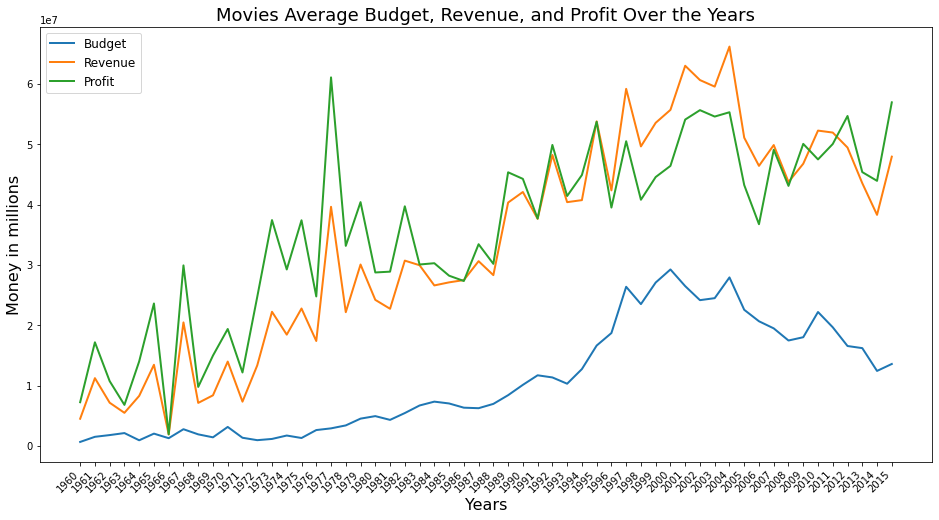

In [129]:
custom_plot(
    each_year_mean.reset_index(), ['budget', 'revenue', 'profit'],
    'Movies Average Budget, Revenue, and Profit Over the Years', "Years",
    'Money in millions', xticks='release_year', linewidth=2,
    legend=["Budget", "Revenue", "Profit"]
)

This graph shows that `budget`, `revenue`, and  `profit` have been growing over the years, but have dropped of in recent years.

<a id='conclusions'></a>
## Conclusions

> In this analysis, data was collected from the TMDB database. It has 10866 datapoints and 20 columns.  

> In the wrangling phase, I discovered that the dataset has a lot of `null` values especially in some columns. These colunmns were not really need for our analysis and were dropped. The dataset contains only one duplicate value, which was dropped. finally, The release_date column has an object (string) datatype, which I converted to datetime datatype.

> In the exploration phase it was discovered that there were a lot of zeros in the `budget`, `revenue` and `runtime` columns, dropping those columns would have resulted in losing most of the dataset, so the mean budget for each year was used to fill up the columns.

> In answering the research question one: Through computations and visualizations, I found out that the genre that has the most popularity is `Adventure`. But over the years the genre that has the most populaty for every year is `Animation`, followed by `Fantasy` and then `Adventure`.

> In answering the research question two: I discovered that the budget of successful movies is almost twice the the budget of tanked movies. Digging deeper, I also found out that the `budget`, `revenue`, and `profit` have been growing over the years, but have dropped of in recent years.


## Limitations

> The dataset like most dataset in the wild, has some issues which needed to rectified in order to do proper analysis on it.
It contains a lot of `null` values in many of the columns. There is also the issue of the `budget`, `revenue`, and `runtine` columns of the dataset having a lot of `0`s (zero's) values, which is as much as 25 - 50 percentile of the dataset. Which makes zero sense, as this will mean that all these movies are without budget and, even if they are without budget that there was no revenue generated.

> The dataset also has columns like `genres`, `cast`, and `director`, where each genre, actor, and director respectively were separated by a pipe (|) symbol. It also has columns where the values where in different units, where comparing the that way would have led to incorrect results.

## Resources

 > https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

 > https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html